<a href="https://colab.research.google.com/github/ushanandhini140/network-intrusion-detection/blob/main/kddcup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

features = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'label'
]

data = pd.read_csv('/content/drive/My Drive/kddcup99_csv.csv', names=features, header=None)

print('The number of data points are:', data.shape[0])
print('=' * 40)

print('The number of features are:', data.shape[1])
print('=' * 40)

print('Some of the features are:', features[:10])


<ipython-input-2-889dc5f259e0>:48: DtypeWarning: Columns (0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/My Drive/kddcup99_csv.csv', names=features, header=None)


The number of data points are: 494021
The number of features are: 42
Some of the features are: ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot']


In [ ]:
print('Null values in dataset are',len(data[data.isnull().any(1)]))

Null values in dataset are 0


<ipython-input-31-6b8a532b8019>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  print('Null values in dataset are',len(data[data.isnull().any(1)]))


In [ ]:
data.drop_duplicates(subset=features, keep='first', inplace = True)
data.shape

(145712, 42)

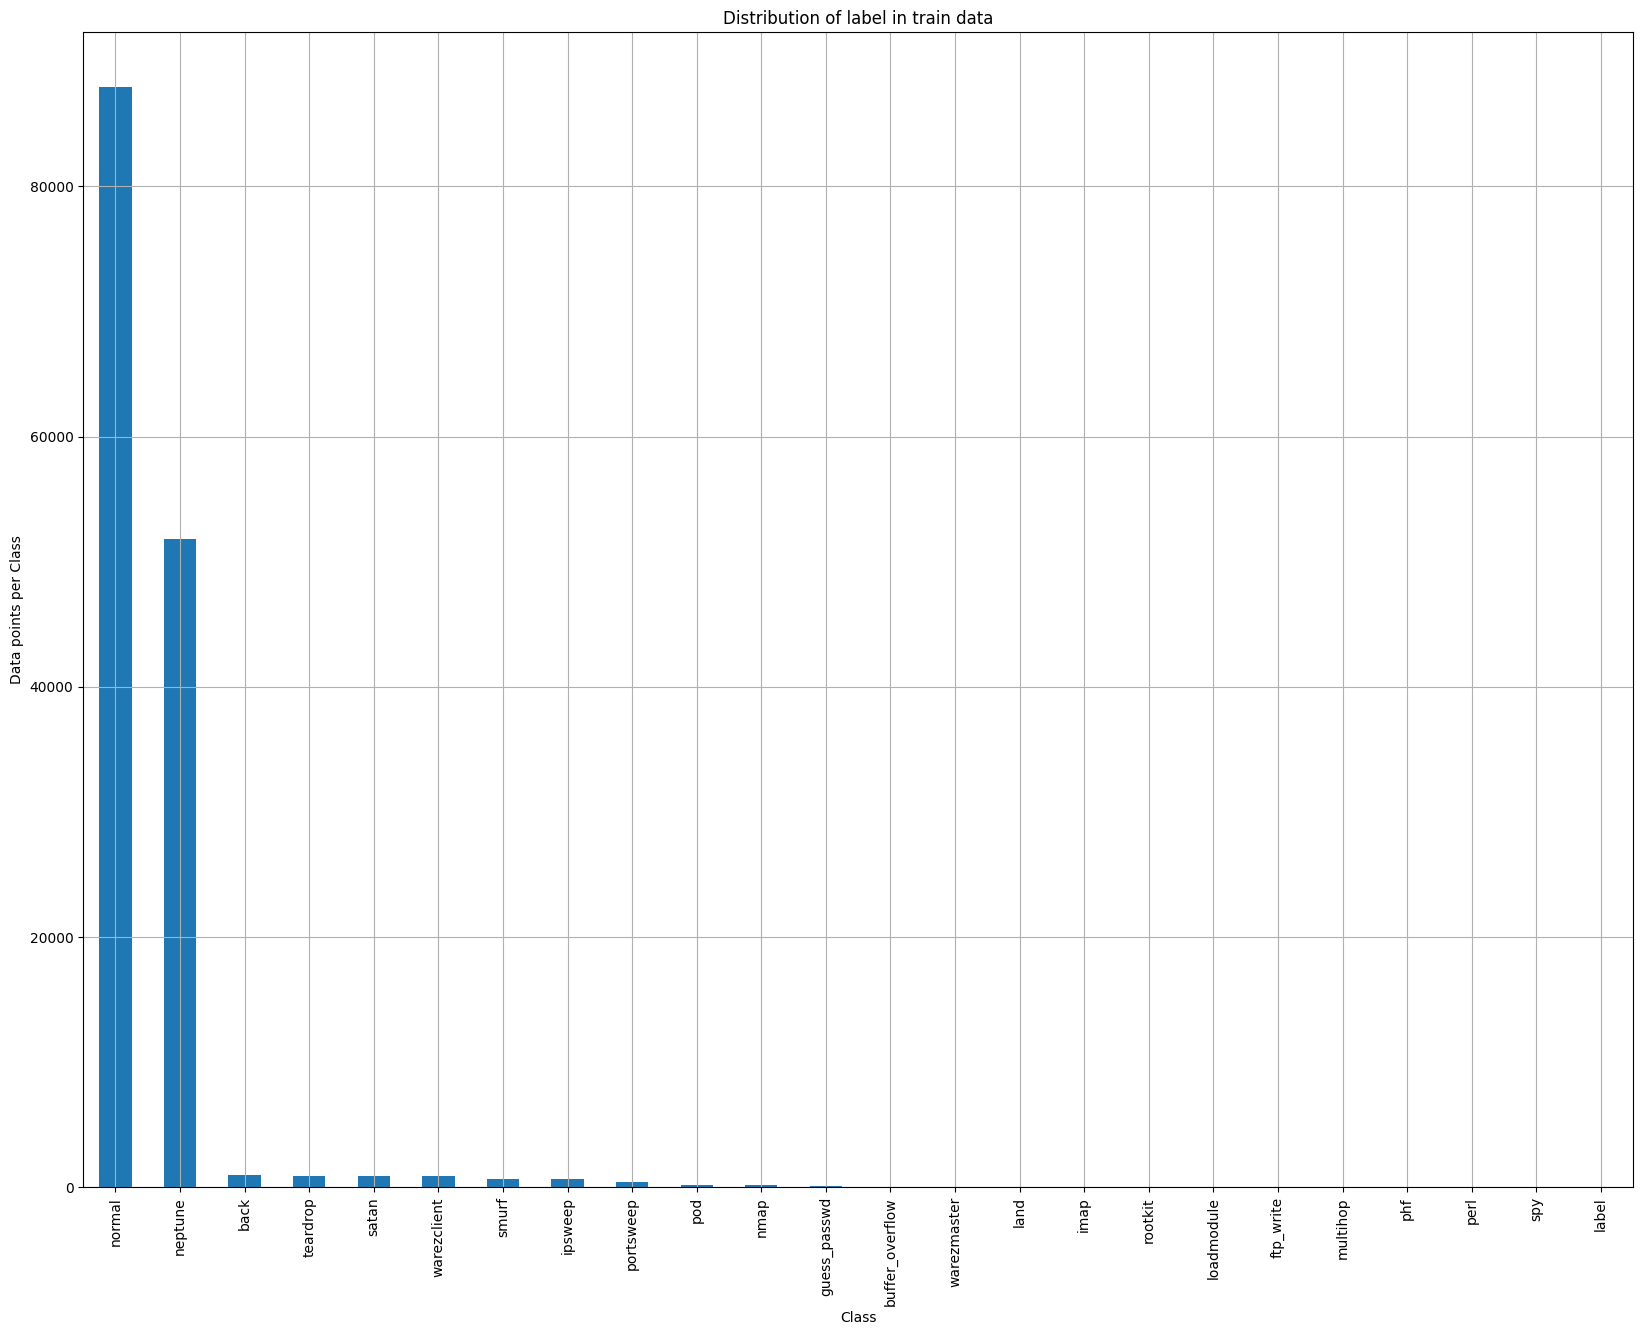

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
class_distribution = data['label'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of label in train data')
plt.grid()
plt.show()

In [ ]:
import numpy as np

# Assuming your class labels are stored in a column named "label" in your DataFrame 'data'
class_labels = data['label'].unique()

sorted_yi = np.argsort(-class_distribution.values)

for i in sorted_yi:
    print('Number of data points in class', class_labels[i], ':', class_distribution.values[i], '(', np.round((class_distribution.values[i] / data.shape[0] * 100), 3), '%)')


Number of data points in class label : 87936 ( 60.349 %)
Number of data points in class normal : 51820 ( 35.563 %)
Number of data points in class buffer_overflow : 968 ( 0.664 %)
Number of data points in class loadmodule : 918 ( 0.63 %)
Number of data points in class perl : 906 ( 0.622 %)
Number of data points in class neptune : 893 ( 0.613 %)
Number of data points in class smurf : 662 ( 0.454 %)
Number of data points in class guess_passwd : 651 ( 0.447 %)
Number of data points in class pod : 416 ( 0.285 %)
Number of data points in class teardrop : 206 ( 0.141 %)
Number of data points in class portsweep : 158 ( 0.108 %)
Number of data points in class ipsweep : 53 ( 0.036 %)
Number of data points in class land : 30 ( 0.021 %)
Number of data points in class ftp_write : 20 ( 0.014 %)
Number of data points in class back : 19 ( 0.013 %)
Number of data points in class imap : 12 ( 0.008 %)
Number of data points in class satan : 10 ( 0.007 %)
Number of data points in class phf : 9 ( 0.006 %)
N

In [ ]:
import pandas as pd

print(data.columns)


Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


x = data.drop(columns=['label'])
y = data['label']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print('Train data')
print(X_train.shape)
print(Y_train.shape)
print('='*20)
print('Test data')
print(X_test.shape)
print(Y_test.shape)
print('='*20)


Train data
(116569, 41)
(116569,)
Test data
(29143, 41)
(29143,)


In [ ]:
protocol = list(X_train['protocol_type'].values)
protocol = list(set(protocol))
print('Protocol types are:', protocol)


Protocol types are: ['udp', 'icmp', 'tcp']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
one_hot = CountVectorizer(vocabulary=protocol, binary=True)
train_protocol = one_hot.fit_transform(X_train['protocol_type'].values)
test_protocol = one_hot.transform(X_test['protocol_type'].values)
print(train_protocol[1].toarray())
print(train_protocol.shape)

[[0 0 1]]
(116569, 3)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

service_one_hot = CountVectorizer(binary=True)

service_one_hot.fit(X_train['service'].values)

train_service = service_one_hot.transform(X_train['service'].values)
test_service = service_one_hot.transform(X_test['service'].values)

flag_one_hot = CountVectorizer(binary=True)


flag_one_hot.fit(X_train['flag'].values)


train_flag = flag_one_hot.transform(X_train['flag'].values)
test_flag = flag_one_hot.transform(X_test['flag'].values)


print("One-hot encoded 'service' for the second sample in the training set:")
print(train_service[1].toarray())

print("One-hot encoded 'flag' for the second sample in the training set:")
print(train_flag[1].toarray())

print("Shapes of 'service' and 'flag' one-hot encoded arrays:")
print(train_service.shape, train_flag.shape)


One-hot encoded 'service' for the second sample in the training set:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
One-hot encoded 'flag' for the second sample in the training set:
[[0 0 0 0 0 0 0 0 0 1 0]]
Shapes of 'service' and 'flag' one-hot encoded arrays:
(116569, 66) (116569, 11)


In [ ]:
X_train['src_bytes'] = pd.to_numeric(X_train['src_bytes'], errors='coerce')
X_test['src_bytes'] = pd.to_numeric(X_test['src_bytes'], errors='coerce')


In [ ]:
X_train['duration'] = pd.to_numeric(X_train['duration'], errors='coerce')
X_test['duration'] = pd.to_numeric(X_test['duration'], errors='coerce')



In [ ]:
X_train['dst_bytes'] = pd.to_numeric(X_train['dst_bytes'], errors='coerce')
X_test['dst_bytes'] = pd.to_numeric(X_test['dst_bytes'], errors='coerce')


In [ ]:
import pywt
import pandas as pd

# Assuming your dataset is named 'data'
# Select only the numerical columns
numerical_columns = data.select_dtypes(include=['int', 'float'])

# Define the wavelet function and level of decomposition
wavelet = 'db1'  # You can choose a different wavelet as needed
level = 3  # Choose the level of decomposition

# Apply wavelet transformation to each column
transformed_data = []
for column in numerical_columns:
    coeffs = pywt.wavedec(data[column], wavelet, level=level)
    for coeff in coeffs:
        transformed_data.append(coeff)

# Create a new DataFrame with the transformed data
transformed_df = pd.DataFrame(transformed_data).transpose()

# Concatenate the transformed DataFrame with the non-numerical columns
# Assuming non-numerical columns are stored in data_non_numerical
final_df = pd.concat([transformed_df, data.select_dtypes(exclude=['int', 'float'])], axis=1)


In [ ]:
from sklearn.preprocessing import StandardScaler

def feature_scaling(X_train, X_test, feature_name):
    scaler = StandardScaler()
    scaler1 = scaler.fit_transform(X_train[feature_name].values.reshape(-1, 1))
    scaler2 = scaler.transform(X_test[feature_name].values.reshape(-1, 1))
    return scaler1, scaler2

# 1. Duration
duration1, duration2 = feature_scaling(X_train, X_test, 'duration')
print(duration1[1])

# 2. src_bytes
src_bytes1, src_bytes2 = feature_scaling(X_train, X_test, 'src_bytes')
print(src_bytes1[1])

# 3. dst_bytes
dst_bytes1, dst_bytes2 = feature_scaling(X_train, X_test, 'dst_bytes')
print(dst_bytes1[1])


[-0.10813571]
[-0.00439147]
[-0.03948449]


In [ ]:
import numpy as np
from scipy.sparse import hstack


X_train_combined = hstack((duration1, src_bytes1, dst_bytes1, train_service, train_flag))


print("Shape of the combined training dataset:", X_train_combined.shape)

X_test_combined = hstack((duration2, src_bytes2, dst_bytes2, test_service, test_flag))

print("Shape of the combined test dataset:", X_test_combined.shape)

Shape of the combined training dataset: (116569, 80)
Shape of the combined test dataset: (29143, 80)


In [ ]:
import pandas as pd


categorical_columns = ['protocol_type', 'service', 'flag']

X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
import pandas as pd
from sklearn.metrics import confusion_matrix
X_train_encoded = X_train_encoded.astype(str)
encoder = LabelEncoder()
X_train_encoded = X_train_encoded.apply(encoder.fit_transform)
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(Y_train), y=Y_train)
KNN_Classifier = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(KNN_Classifier, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train_encoded, Y_train)
best_n_neighbors = grid_search.best_params_['n_neighbors']
best_KNN_Classifier = KNeighborsClassifier(n_neighbors=best_n_neighbors)
best_KNN_Classifier.fit(X_train_encoded, Y_train)
y_pred_best_knn = best_KNN_Classifier.predict(X_train_encoded)
classification_rep_best_knn = classification_report(Y_train, y_pred_best_knn, zero_division='warn')
print(f'Best n_neighbors found: {best_n_neighbors}')
print('Classification Report-KNN:')
print(classification_rep_best_knn)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best n_neighbors found: 3
Classification Report-KNN:
                 precision    recall  f1-score   support

           back       0.99      0.97      0.98       756
buffer_overflow       0.60      0.67      0.63        27
      ftp_write       0.60      0.38      0.46         8
   guess_passwd       1.00      0.95      0.98        44
           imap       0.86      0.60      0.71        10
        ipsweep       0.94      0.98      0.96       515
           land       0.93      0.93      0.93        15
     loadmodule       0.00      0.00      0.00         9
       multihop       0.50      0.20      0.29         5
        neptune       1.00      1.00      1.00     41509
           nmap       0.97      0.73      0.83       127
         normal       1.00      1.00      1.00     70331
           perl       0.00      0.00      0.00         1
            phf       1.00      0.33      0.50         3
            pod       0.95      0.95      0.95       163
      portsweep       0.98      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


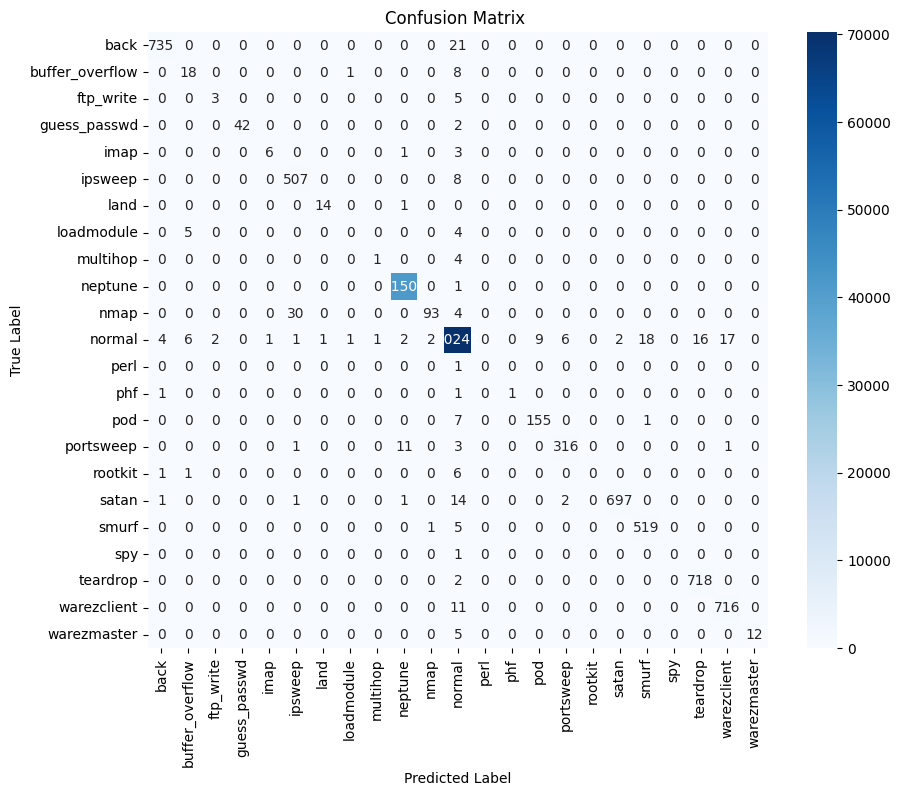

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
# Compute confusion matrix
conf_mat_best_knn = confusion_matrix(Y_train, y_pred_best_knn)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_best_knn, annot=True, fmt='d', cmap='Blues', xticklabels=best_KNN_Classifier.classes_, yticklabels=best_KNN_Classifier.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix ')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


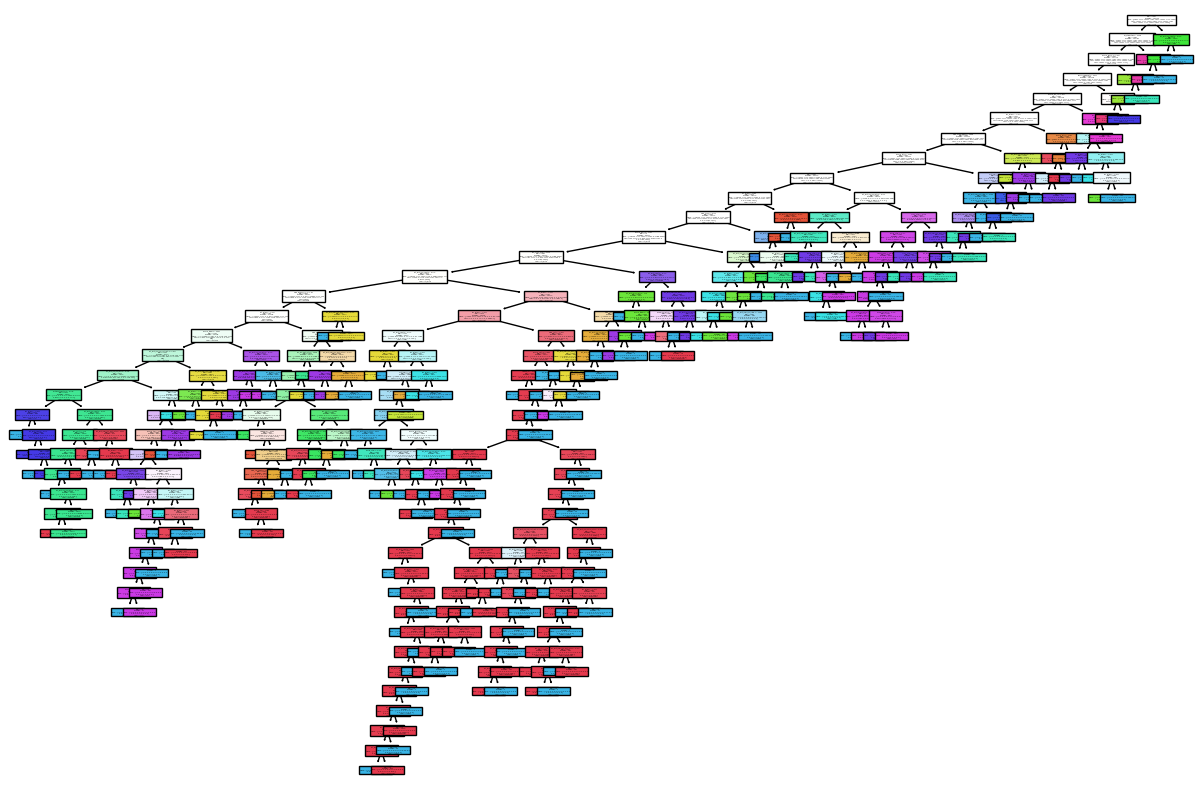

Best parameters found: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5}
Classification Report (Best Decision Tree):
                 precision    recall  f1-score   support

           back       1.00      1.00      1.00       756
buffer_overflow       1.00      1.00      1.00        27
      ftp_write       1.00      1.00      1.00         8
   guess_passwd       1.00      1.00      1.00        44
           imap       1.00      1.00      1.00        10
        ipsweep       1.00      1.00      1.00       515
           land       1.00      1.00      1.00        15
     loadmodule       1.00      1.00      1.00         9
       multihop       1.00      1.00      1.00         5
        neptune       1.00      1.00      1.00     41509
           nmap       1.00      1.00      1.00       127
         normal       1.00      1.00      1.00     70331
           perl       1.00      1.00      1.00         1
            phf       1.00     

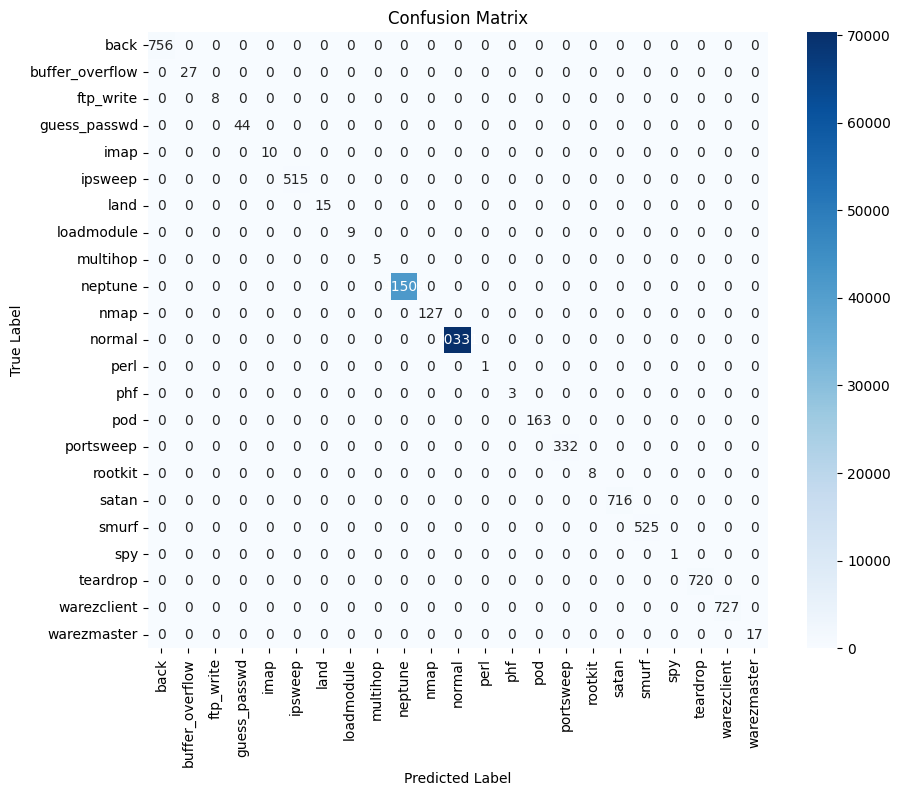

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Define the Decision Tree Classifier
DTC_Classifier = DecisionTreeClassifier()

# Define the parameter grid for tuning
param_grid = {
    'classifier__max_depth': [None, 10, 20],  # Specify max_depth for the DecisionTreeClassifier
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Define the pipeline with oversampling and classifier
pipeline = Pipeline([
    ('oversample', RandomOverSampler()),  # Oversampling to handle class imbalance
    ('scaler', StandardScaler()),  # Standardize features
    ('classifier', DTC_Classifier)
])

# Initialize StratifiedKFold with 5 splits
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with the pipeline and parameter grid
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='accuracy')

# Perform grid search to find the best parameters
grid_search.fit(X_train_encoded, Y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best Decision Tree Classifier with the best parameters
best_DTC_Classifier = grid_search.best_estimator_

# Fit the best classifier to the entire training dataset
best_DTC_Classifier.fit(X_train_encoded, Y_train)

# Make predictions using the best classifier
y_pred_best_dt = best_DTC_Classifier.predict(X_train_encoded)

# Generate a classification report with the best classifier
classification_rep_best_dt = classification_report(Y_train, y_pred_best_dt, zero_division='warn')
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(best_DTC_Classifier.named_steps['classifier'], feature_names=X_train_encoded.columns, class_names=best_DTC_Classifier.named_steps['classifier'].classes_, filled=True)
plt.show()

# Print the results
print(f'Best parameters found: {best_params}')
print('Classification Report (Best Decision Tree):')
print(classification_rep_best_dt)

# Compute confusion matrix
conf_mat_best_dt = confusion_matrix(Y_train, y_pred_best_dt)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_best_dt, annot=True, fmt='d', cmap='Blues', xticklabels=best_DTC_Classifier.classes_, yticklabels=best_DTC_Classifier.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Mean Validation Accuracy (Random Forest - Best Model): 1.00
Classification Report (Random Forest - Best Model):
                 precision    recall  f1-score   support

           back       1.00      1.00      1.00       756
buffer_overflow       1.00      1.00      1.00        27
      ftp_write       1.00      1.00      1.00         8
   guess_passwd       1.00      1.00      1.00        44
           imap       1.00      1.00      1.00        10
        ipsweep       1.00      1.00      1.00       515
           land       1.00      1.00      1.00        15
     loadmodule       1.00      1.00      1.00         9
       multihop       1.00      1.00      1.00         5
        neptune       1.00      1.00      1.00     41509
           nmap       1.00      1.00      1.00       127
         normal       1.00      1.00      1.00     70331
           perl       1.00      1.00      

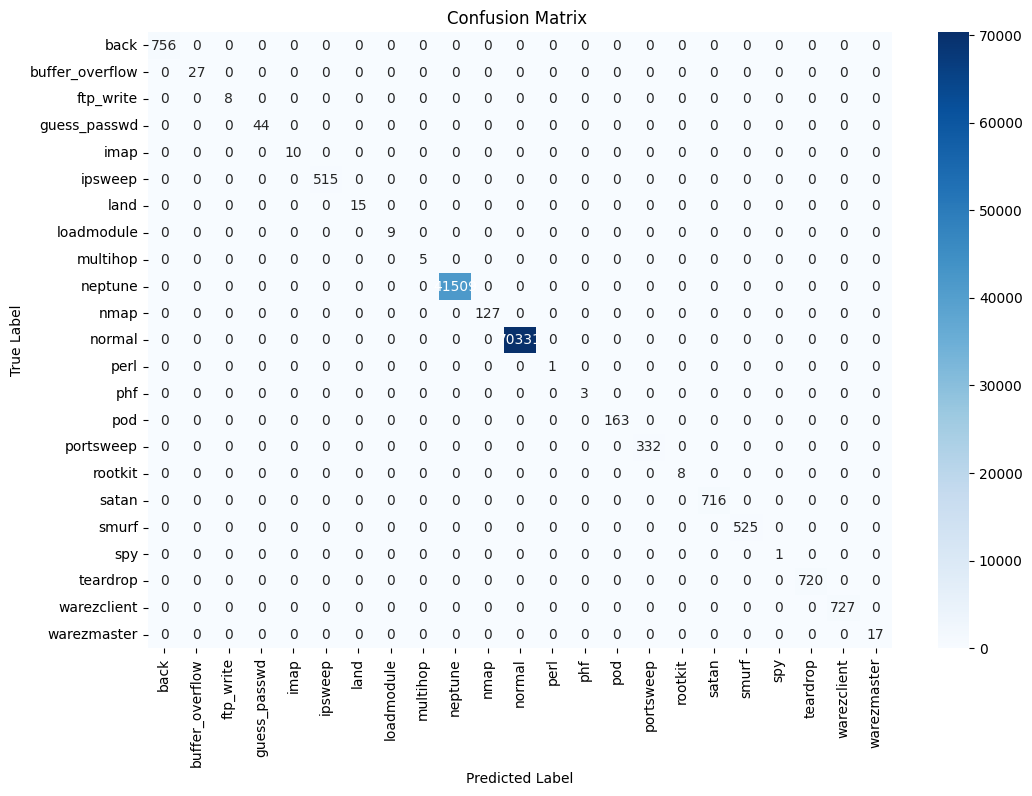

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Create a Random Forest Classifier
RF_Classifier = RandomForestClassifier()

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RF_Classifier, param_grid=param_grid, cv=5)

# Perform grid search
grid_search.fit(X_train_encoded, Y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred_rf_best = best_model.predict(X_train_encoded)

# Calculate mean validation accuracy
mean_validation_accuracy_rf_best = (y_pred_rf_best == Y_train).mean()

# Generate a classification report for the best model
classification_rep_rf_best = classification_report(Y_train, y_pred_rf_best, zero_division='warn')

# Print the results
print("Best parameters:", best_params)
print(f'Mean Validation Accuracy (Random Forest - Best Model): {mean_validation_accuracy_rf_best:.2f}')
print('Classification Report (Random Forest - Best Model):')
print(classification_rep_rf_best)
conf_matrix_rf_best = confusion_matrix(Y_train, y_pred_rf_best)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_rf_best, annot=True, fmt="d", cmap="Blues", xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix ')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report (Naive Bayes):
                 precision    recall  f1-score   support

           back       1.00      0.96      0.98       756
buffer_overflow       0.02      0.59      0.04        27
      ftp_write       0.00      0.12      0.01         8
   guess_passwd       0.01      0.98      0.03        44
           imap       0.04      0.10      0.06        10
        ipsweep       0.09      1.00      0.17       515
           land       0.00      0.00      0.00        15
     loadmodule       0.01      0.67      0.01         9
       multihop       0.00      0.00      0.00         5
        neptune       0.90      1.00      0.95     41509
           nmap       0.01      0.11      0.02       127
         normal       0.99      0.72      0.83     70331
           perl       0.03      1.00      0.05         1
            phf       0.03      1.00      0.06         3
            pod       0.35      0.99      0.52       163
      portsweep       0.09      0.19      0.12    

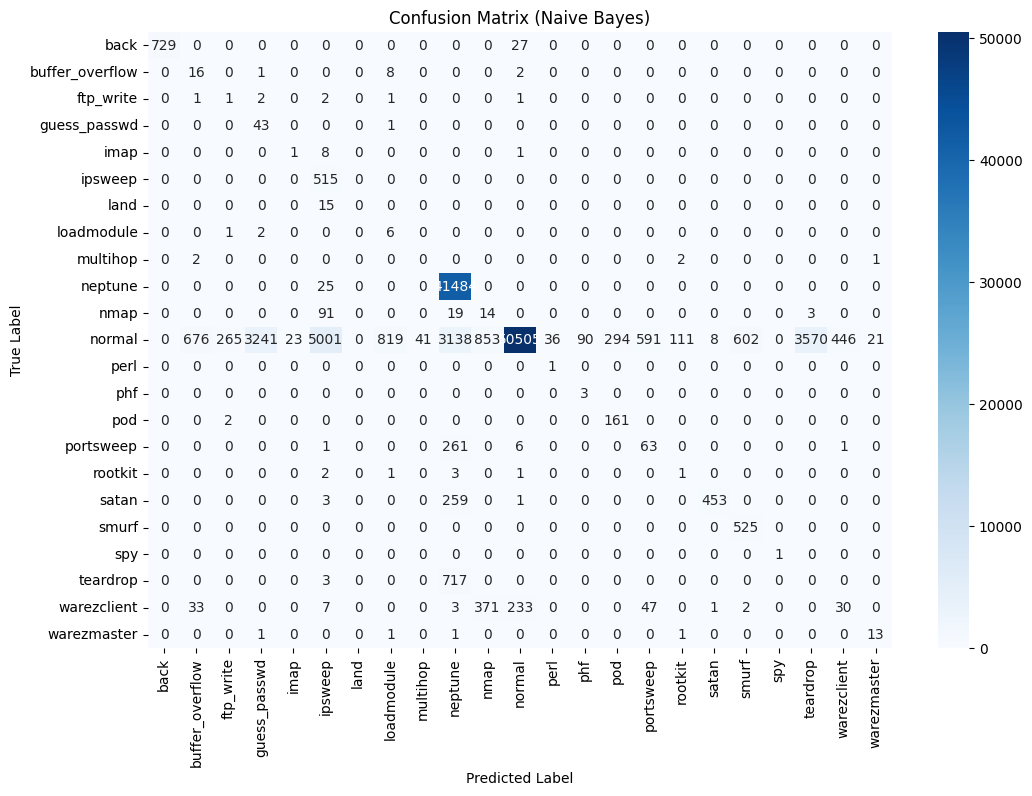

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import class_weight

# Compute class weights to handle class imbalance
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(Y_train), y=Y_train)

# Create a Gaussian Naive Bayes Classifier
NB_Classifier = GaussianNB()

# Fit the classifier to the training data with adjusted class priors
NB_Classifier.class_prior_ = class_weights

# Fit the classifier to the training data
NB_Classifier.fit(X_train_encoded, Y_train)

# Make predictions on the training data
y_pred_nb = NB_Classifier.predict(X_train_encoded)

# Generate a classification report
classification_rep_nb = classification_report(Y_train, y_pred_nb, zero_division='warn')

# Print the classification report
print('Classification Report (Naive Bayes):')
print(classification_rep_nb)

# Compute and plot the confusion matrix
conf_matrix_nb = confusion_matrix(Y_train, y_pred_nb)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues", xticklabels=NB_Classifier.classes_, yticklabels=NB_Classifier.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Naive Bayes)')
plt.show()


In [ ]:
import pandas as pd

# Load the data from the CSV file
data = pd.read_csv('/content/drive/My Drive/kddcup99_csv.csv')

# Print the labels
print("Labels:")
print(data['label'].unique())


Labels:
['normal' 'buffer_overflow' 'loadmodule' 'perl' 'neptune' 'smurf'
 'guess_passwd' 'pod' 'teardrop' 'portsweep' 'ipsweep' 'land' 'ftp_write'
 'back' 'imap' 'satan' 'phf' 'nmap' 'multihop' 'warezmaster' 'warezclient'
 'spy' 'rootkit']
